In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df1=pd.read_csv(r"D:\dataset\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv(r"D:\dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv(r"D:\dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv(r"D:\dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv(r"D:\dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv(r"D:\dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv(r"D:\dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv(r"D:\dataset/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df.head(50)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [5]:
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
for column, count in missing_values.items():
    if count != 0:
        print(f"Column '{column}' has {count} missing values, which is {missing_percentage[column]:.2f}% of the total")

Column 'Flow Bytes/s' has 1358 missing values, which is 0.05% of the total


In [6]:

df= df.drop_duplicates(keep='first')
df.shape

(2522362, 79)

In [7]:
zero_columns = [col for col in df.columns if (df[col] == 0).all()]

print("Columns with only zero values:", zero_columns)

Columns with only zero values: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [8]:
identical_columns = {}

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].equals(df[col2]):
            identical_columns.setdefault(col1, []).append(col2)

if identical_columns:
    print("Identical columns found:")
    for col1, duplicates in identical_columns.items():
        print(f"'{col1}' is identical to {duplicates}")
else:
    print("No identical columns found.")


Identical columns found:
' Total Fwd Packets' is identical to ['Subflow Fwd Packets']
' Total Backward Packets' is identical to [' Subflow Bwd Packets']
'Fwd PSH Flags' is identical to [' SYN Flag Count']
' Bwd PSH Flags' is identical to [' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
' Fwd URG Flags' is identical to [' CWE Flag Count']
' Bwd URG Flags' is identical to [' Bwd PSH Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
' Fwd Header Length' is identical to [' Fwd Header Length.1']
' SYN Flag Count' is identical to ['Fwd PSH Flags']
' CWE Flag Count' is identical to [' Fwd URG Flags']
' Fwd Header Length.1' is identical to [' Fwd Header Length']
'Fwd Avg Bytes/Bulk' is identical to [' Bwd PSH Flags', ' Bwd URG Flags', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg By

In [9]:
columns_to_drop = {col for duplicates in identical_columns.values() for col in duplicates}
df=df.drop(columns=columns_to_drop)

print("Updated DataFrame after removing identical columns:")
print(df)

Updated DataFrame after removing identical columns:
         Destination Port   Flow Duration  Total Length of Fwd Packets  \
0                   54865               3                           12   
1                   55054             109                            6   
2                   55055              52                            6   
3                   46236              34                            6   
4                   54863               3                           12   
...                   ...             ...                          ...   
692698                 53           32215                          112   
692699                 53             324                           84   
692700              58030              82                           31   
692701                 53         1048635                          192   
692702                 53           94939                          188   

         Total Length of Bwd Packets   Fwd Packet Length Ma

In [10]:
row_missing_percentage = (df.isna().sum(axis=1) / df.shape[1]) * 100
print(row_missing_percentage.describe())

missing_rows = df.isna().any(axis=1).sum()
print(f'\nTotal rows with missing values: {missing_rows}')

count    2.522362e+06
mean     2.294233e-04
std      1.939204e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.639344e+00
dtype: float64

Total rows with missing values: 353


In [11]:
# Dropping missing values
new_df = df.dropna()
print(f'Dataset shape after row-wise removal: {new_df.shape}')

Dataset shape after row-wise removal: (2522009, 61)


In [12]:
# Checking for infinite values
num_columns = new_df.select_dtypes(include = np.number).columns
has_infinite = np.isinf(new_df[num_columns]).sum()
print(has_infinite[has_infinite > 0])

Flow Bytes/s       1211
 Flow Packets/s    1211
dtype: int64


In [13]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2252\1412808661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [14]:
nan_rows = new_df[new_df.isna().any(axis=1)]


In [15]:
new_df = new_df.dropna().reset_index(drop=True)

In [16]:
group_mapping = {
    'BENIGN': 'Normal Traffic',
    'DoS Hulk': 'DoS',
    'DDoS': 'DDoS',
    'PortScan': 'Port Scanning',
    'DoS GoldenEye': 'DoS',
    'FTP-Patator': 'Brute Force',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bots',
    'Web Attack � Brute Force': 'Web Attacks',
    'Web Attack � XSS': 'Web Attacks',
    'Infiltration': 'Infiltration',
    'Web Attack � Sql Injection': 'Web Attacks',
    'Heartbleed': 'Miscellaneous'
}

new_df[' Label']=new_df[' Label'].map(group_mapping)

In [17]:
new_df[' Label'].value_counts()

 Label
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Infiltration           36
Miscellaneous          11
Name: count, dtype: int64

In [18]:
attack_label_mapping = {
    "Normal Traffic": 0,
    "DoS": 1,
    "DDoS": 2,
    "Port Scanning": 3,
    "Brute Force": 4,
    "Web Attacks": 5,
    "Bots": 6,
    "Infiltration": 7,
    "Miscellaneous": 8
}

print("Attack Types and Corresponding Labels:\n")
for attack, label in attack_label_mapping.items():
    print(f"Label {label}: {attack}")

Attack Types and Corresponding Labels:

Label 0: Normal Traffic
Label 1: DoS
Label 2: DDoS
Label 3: Port Scanning
Label 4: Brute Force
Label 5: Web Attacks
Label 6: Bots
Label 7: Infiltration
Label 8: Miscellaneous


In [19]:
attack_label_mapping = {
    "Normal Traffic": 0,
    "DoS": 1,
    "DDoS": 2,
    "Port Scanning": 3,
    "Brute Force": 4,
    "Web Attacks": 5,
    "Bots": 6,
    "Infiltration": 7,
    "Miscellaneous": 8
}
new_df['Label'] = new_df[' Label'].map(attack_label_mapping)


In [20]:

new_df['Label'].value_counts()



Label
0    2095057
1     193745
2     128014
3      90694
4       9150
5       2143
6       1948
7         36
8         11
Name: count, dtype: int64

In [21]:
normal_traf =new_df[new_df['Label'] == 0].describe()
dos_attack = new_df[new_df['Label'] == 1].describe()

print("Normal Traffic Stats:\n", normal_traf)
print("\nDoS Traffic Stats:\n", dos_attack)

Normal Traffic Stats:
         Destination Port   Flow Duration  Total Length of Fwd Packets  \
count       2.095057e+06    2.095057e+06                 2.095057e+06   
mean        1.005851e+04    1.216024e+07                 6.839212e+02   
std         2.032511e+04    3.118383e+07                 1.107516e+04   
min         0.000000e+00   -1.300000e+01                 0.000000e+00   
25%         5.300000e+01    2.030000e+02                 1.800000e+01   
50%         8.000000e+01    3.997900e+04                 6.800000e+01   
75%         4.430000e+02    1.097895e+06                 2.080000e+02   
max         6.553500e+04    1.200000e+08                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.095057e+06            2.095057e+06   
mean                   2.044406e+04            2.479432e+02   
std                    2.630522e+06            8.218756e+02   
min                    0.000000e+00            0.000000e+00   
25% 

In [22]:
new_df=new_df.drop(columns=' Label')

In [23]:
import numpy as np
import pandas as pd

# Separate normal and intrusion traffic
X_sample = new_df.loc[new_df['Label'] == 0]
y_sample= new_df.loc[new_df['Label'] == 1]

print(X_sample['Label'].value_counts())
print(y_sample['Label'].value_counts())


Label
0    2095057
Name: count, dtype: int64
Label
1    193745
Name: count, dtype: int64


In [24]:
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Assuming X_sample has Label == 0 (majority)
# and y_sample has Label == 1 (minority)
X_majority = X_sample
y_minority = y_sample

# Set target size for balancing (can choose min or max class size)
target_size = min(len(X_majority), len(y_minority))

# Undersample majority class (Label == 0)
X_majority_downsampled = resample(
    X_majority,
    replace=False,
    n_samples=target_size,
    random_state=42
)

# Upsample minority class (Label == 1)
y_minority_upsampled = resample(
    y_minority,
    replace=True,
    n_samples=target_size,
    random_state=42
)

# Combine into one balanced DataFrame
df_balanced = pd.concat([X_majority_downsampled, y_minority_upsampled])

# Shuffle the combined data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


 # Split back into X and y
X_balanced = df_balanced.drop(columns=['Label'])
y_balanced = df_balanced['Label']

print("Downsampling complete.")
print(y_balanced.value_counts())


Downsampling complete.
Label
1    193745
0    193745
Name: count, dtype: int64


In [25]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

# 🔹 Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# 🔹 Step 2: Feature Scaling (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Step 3: Apply PCA (retain 95% variance or choose n_components)
pca = PCA(n_components=0.90, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ✅ Done
print("Shape after PCA:")
print("X_train_pca:", X_train_pca.shape)
print("X_test_pca:", X_test_pca.shape)




Shape after PCA:
X_train_pca: (309992, 18)
X_test_pca: (77498, 18)


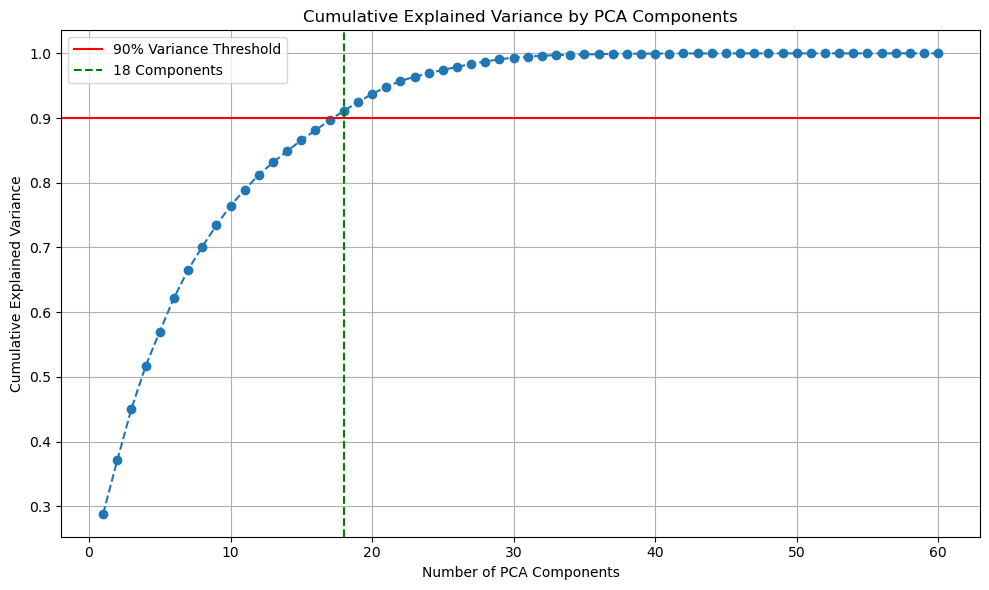

Number of components to retain 90% variance: 18


In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA without limiting number of components
pca_full = PCA()
pca_full.fit(X_train_scaled)  # Use scaled (not PCA-reduced) training data

# Explained variance and cumulative sum
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='red', linestyle='-', label='90% Variance Threshold')
plt.axvline(x=n_components_90, color='green', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print number of components for 90% variance
print(f"Number of components to retain 90% variance: {n_components_90}")



In [27]:
from sklearn.decomposition import PCA

# You can choose the number of components manually or based on variance
# Option 1: Fixed number (e.g., 6 for quantum kernel with 6 qubits)
pca = PCA(n_components=18, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [28]:
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit_aer import AerSimulator
from qiskit import transpile
#from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel, FidelityStatevectorKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.providers import BackendV2 as Backend
from qiskit.transpiler import Target
from qiskit_ibm_runtime import SamplerV2 as Sampler, Session
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
# from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import StatevectorSampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC# number of qubits is equal to the number of features


In [29]:
backend=AerSimulator()
session=Session(backend)
sampler=Sampler(mode=session)
num_qubits = 18
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)
feature_map=transpile(feature_map, backend=backend)
# fidelity = ComputeUncompute(sampler=sampler)
# qkernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
qkernel = FidelityStatevectorKernel(feature_map=feature_map)

In [30]:
backend=AerSimulator()
session=Session(backend)
sampler=Sampler(mode=session)
num_qubits = 18
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)
feature_map=transpile(feature_map, backend=backend)
# fidelity = ComputeUncompute(sampler=sampler)
# qkernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
qkernel = FidelityStatevectorKernel(feature_map=feature_map)

In [31]:
import time
#from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train QSVC
qsvc = QSVC(quantum_kernel=qkernel)
qsvc.fit(X_train_pca, y_train)

start_time = time.time()
qsvc.fit(X_train_pca, y_train)
y_pred = qsvc.predict(X_test_pca)
end_time = time.time()

MemoryError: Unable to allocate 4.00 MiB for an array with shape (2, 131072) and data type complex128

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import time

y_train_pred = qsvc.predict(X_train_pca)
y_test_pred = qsvc.predict(X_test_pca)

# Step 7: Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"QSVC Training Accuracy: {train_acc:.4f}")
print(f"QSVC Testing Accuracy: {test_acc:.4f}")
#print(f"Training Time: {train_time:.2f} sec")
#print(f"Prediction Time: {pred_time:.2f} sec")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("QSVC Confusion Matrix (Test Data after Global SMOTE)")
plt.show()